<a href="https://colab.research.google.com/github/Vivi1008/colab2/blob/main/Kumar_Vivek_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1:

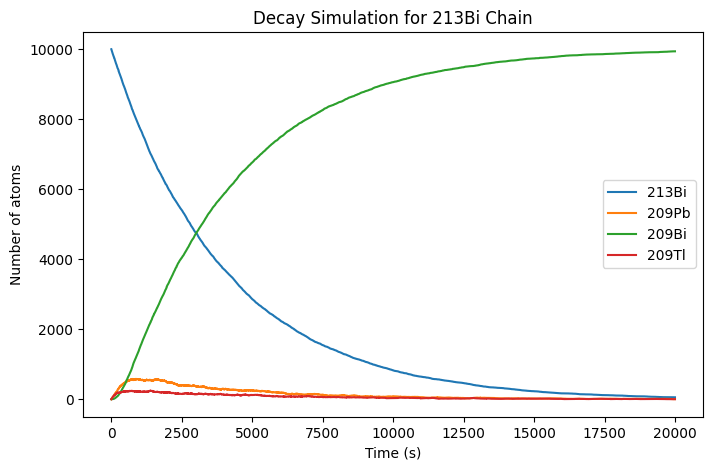

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

tau_bi213 = 2760
tau_pb = 200
tau_tl = 132
dt = 1

def decay_probability(tau, dt):
    return 1 - 2**(-dt / tau)

num_bi213 = 10000
num_pb209 = 0
num_bi209 = 0
num_tl209 = 0

time_values = []
bi213_values = []
pb209_values = []
bi209_values = []
tl209_values = []

time = 0
max_time = 20000

while time < max_time:
    time_values.append(time)
    bi213_values.append(num_bi213)
    pb209_values.append(num_pb209)
    bi209_values.append(num_bi209)
    tl209_values.append(num_tl209)

    p_bi = decay_probability(tau_bi213, dt)
    decayed_bi = np.sum(np.random.rand(num_bi213) < p_bi)
    num_bi213 -= decayed_bi

    new_pb209 = int(0.64 * decayed_bi)
    new_tl209 = decayed_bi - new_pb209
    num_pb209 += new_pb209
    num_tl209 += new_tl209

    p_tl = decay_probability(tau_tl, dt)
    decayed_tl = np.sum(np.random.rand(num_tl209) < p_tl)
    num_tl209 -= decayed_tl
    num_pb209 += decayed_tl

    p_pb = decay_probability(tau_pb, dt)
    decayed_pb = np.sum(np.random.rand(num_pb209) < p_pb)
    num_pb209 -= decayed_pb
    num_bi209 += decayed_pb

    time += dt

plt.figure(figsize=(8, 5))
plt.plot(time_values, bi213_values, label='213Bi')
plt.plot(time_values, pb209_values, label='209Pb')
plt.plot(time_values, bi209_values, label='209Bi')
plt.plot(time_values, tl209_values, label='209Tl')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.title('Decay Simulation for 213Bi Chain')
plt.show()

Exercise 2

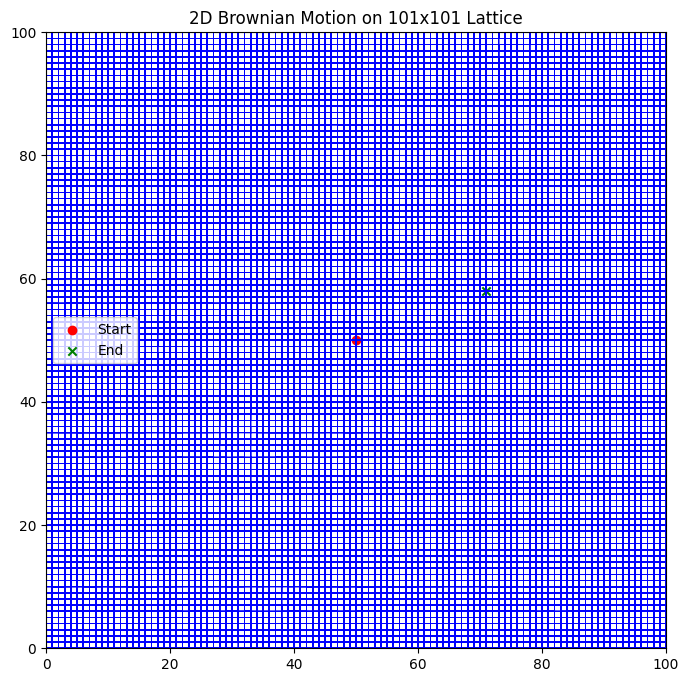

In [ ]:
def brownian_motion_2d(steps=1000, lattice_size=101):
    lattice = np.zeros((lattice_size, lattice_size))

    center = lattice_size // 2
    x, y = center, center

    path_x = [x]
    path_y = [y]

    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    for _ in range(steps):
        dx, dy = moves[np.random.randint(0, 4)]

        new_x, new_y = x + dx, y + dy

        if 0 <= new_x < lattice_size and 0 <= new_y < lattice_size:
            x, y = new_x, new_y

        path_x.append(x)
        path_y.append(y)

    plt.figure(figsize=(8, 8))
    plt.plot(path_x, path_y, color='blue', linewidth=0.5)
    plt.scatter(center, center, color='red', marker='o', label='Start')
    plt.scatter(x, y, color='green', marker='x', label='End')
    plt.xlim(0, lattice_size - 1)
    plt.ylim(0, lattice_size - 1)
    plt.legend()
    plt.title(f'2D Brownian Motion on {lattice_size}x{lattice_size} Lattice')
    plt.grid(True)
    plt.show()

brownian_motion_2d(steps=1000000)


Exercise 3(a):

<ipython-input-23-6d1d7416bddb>:1: RuntimeWarning: divide by zero encountered in divide
  pathological_osc = lambda x: np.square(np.sin(1/(x*(2-x))))
<ipython-input-23-6d1d7416bddb>:1: RuntimeWarning: invalid value encountered in sin
  pathological_osc = lambda x: np.square(np.sin(1/(x*(2-x))))
<ipython-input-23-6d1d7416bddb>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


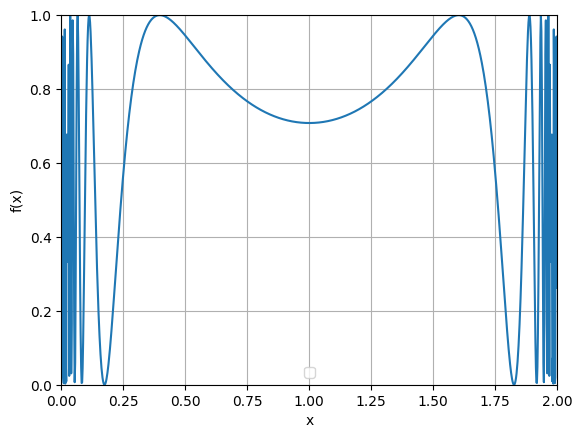

1.45056
0.0030406067184034174


In [ ]:
pathological_osc = lambda x: np.square(np.sin(1/(x*(2-x))))

integrand = pathological_osc

a = 0
b = 2
x = np.linspace(a,b,1000)
plt.plot(x, integrand(x))
plt.grid()
plt.xlim([0,2])
plt.ylim([0,1])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

def point():
  point = np.array([np.random.uniform(0, 2), np.random.uniform(0, 1)])
  return point

inside = []

def check(function, N):
  for i in range(N):
    dot = point()
    if function(dot[0]) >= dot[1]:
      inside.append(dot[0])
  return len(inside)/N

I = check(integrand, 100000)
print(I*2)

error = np.sqrt((I*(2-I))/100000)
print(error)


Exercse 3(b):

In [ ]:
#Mean Value Method
def x_values(N):
  list = []
  for i in range(N):
    list.append(np.random.uniform(0, 2))
  return list

N = 1000000
x = x_values(N)
function = lambda x: np.square(np.sin(1/(x*(2-x))))

func_value = []
for i in range(N):
  func_value.append(function(x[i]))

sum = np.sum(func_value)
mean = sum/N
square_sum = 0
for i in range(N):
  square_sum += np.square(func_value[i])

I = 2*sum/N

error = np.sqrt((square_sum/N) - np.square(mean))


print(I)
print(error)

1.45175805908043
0.26340281782927594


Exercise 4

In [ ]:
import numpy as np

def monte_carlo_10d_area(num_points=1000000):
    points = np.random.uniform(-1, 1, (num_points, 10))

    distances_squared = np.sum(points**2, axis=1)

    inside_sphere = np.sum(distances_squared <= 1)

    cube_volume = 2**10

    sphere_volume = (inside_sphere / num_points) * cube_volume

    print(f"Estimated Volume of 10D Unit Sphere: {sphere_volume}")

monte_carlo_10d_area()


Estimated Volume of 10D Unit Sphere: 2.51392


Exercise 5(a):

$w(x) = x^{-1/2}$

$p(x) = \frac{w(x)}{\int_{a}^{b} w(x) dx}$

$\int_{0}^{1} x^{-1/2}dx = 2$

$p(x) = \frac{1}{2 x^{1/2}}$

$CDF : F(x) = \int_{0}^{1} \frac{1}{2 x^{1/2}} dx = \sqrt{x}$

Transform Function:
$ x = u^2 $


In [ ]:
import numpy as np
from scipy.integrate import quad

def f(x):
  f = []
  for i in range(len(x)):
    f.append(x[i]**-0.5 / (np.exp(x[i]) + 1))
  return f

def w(x):
  return x**-0.5

def w_list(x):
  w_list = []
  for i in range(len(x)):
    w_list.append(x[i]**-0.5)
  return w_list

def generate_samples(N):
    # Generate random numbers using the inverse transform method
    u = np.random.uniform(0, 1, N)
    x_samples = u**2
    return x_samples

def evaluate_integral(N):
    x_samples = generate_samples(N)
    f_values = f(x_samples)
    w_values = w_list(x_samples)
    # Importance sampling formula
    w_integral, _ = quad(w, 0, 1)
    value = []
    for i in range(N):
      value.append(f_values[i] /w_values[i])
    average = np.mean(value)
    integral_estimate = average*w_integral
    return integral_estimate

integral_estimate = evaluate_integral(1000000)
print(f"Estimated Integral: {integral_estimate}")

Estimated Integral: 0.8391481184085712


Exercise 6

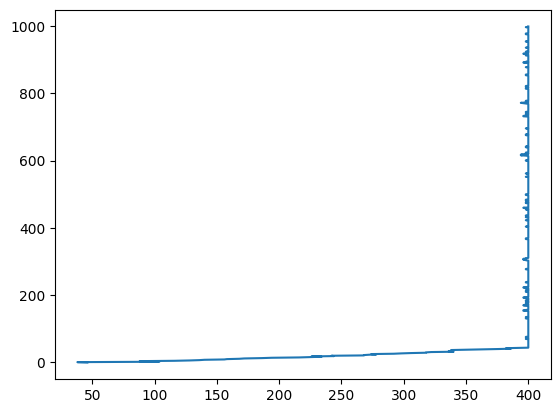

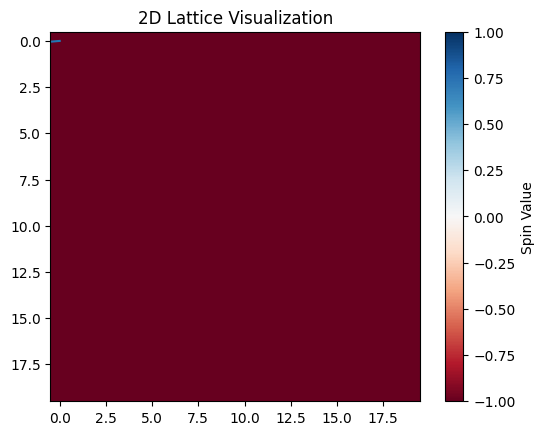

-400


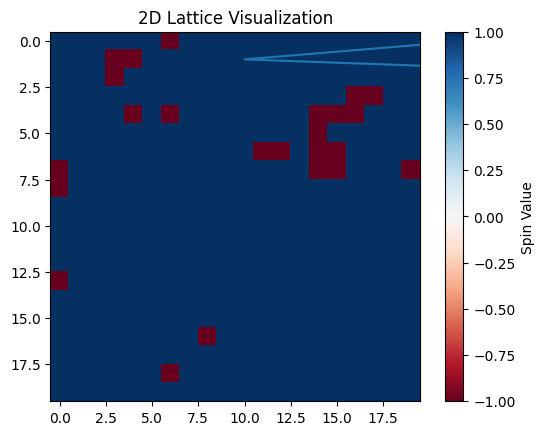

352


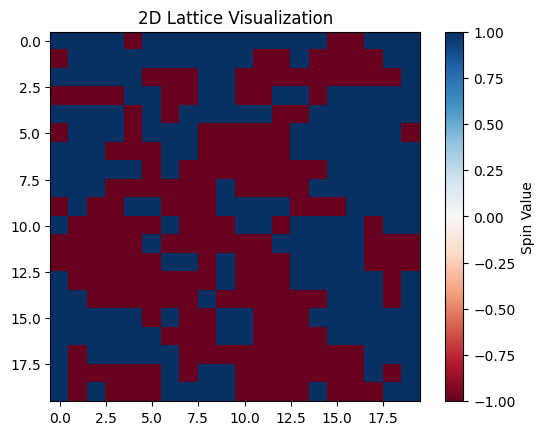

20


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_lattice(N):
    return np.random.choice([-1, 1], size=(N, N))

def energy(lattice, N):
    E = 0
    for i in range(N):
        for j in range(N):
            S = lattice[i, j]
            neighbors = lattice[(i+1) % N, j] + lattice[(i-1) % N, j] + \
                        lattice[i, (j+1) % N] + lattice[i, (j-1) % N]
            E += -S * neighbors
    return (E / 2)

def metropolis_step(lattice, N, T):
    for _ in range(N * N):
        i, j = np.random.randint(0, N, size=2)
        S = lattice[i, j]
        neighbors = lattice[(i+1) % N, j] + lattice[(i-1) % N, j] + \
                    lattice[i, (j+1) % N] + lattice[i, (j-1) % N]
        dE = 2 * S * neighbors

        if dE < 0 or np.random.rand() < np.exp(-dE / T):
            lattice[i, j] *= -1

def magnetization(lattice):
    return np.sum(lattice)

def simulate_ising(N, T, steps):
    lattice = initialize_lattice(N)
    M = []
    step = []
    for i in range(steps):
        metropolis_step(lattice, N, T)
        M.append(magnetization(lattice))
        step.append(i)


    return lattice, M, step

N = 20
T = 1
steps = 1000

final_lattice, M, step = simulate_ising(N, T, steps)
plt.plot(M, step)
plt.show()

for i in range(3):
  T = i + 1
  final_lattice, M, step = simulate_ising(N, T, steps)
  plt.plot(M, step)
  plt.imshow(final_lattice, cmap=cmap, vmin=-1, vmax=1)
  plt.colorbar(label='Spin Value')
  plt.title('2D Lattice Visualization')
  plt.show()
  print(M[len(step)-1])

Exercise 6(d):
The magnetisation is almost always 400 or a close number but with either positive or negative signs at random. This is because after enough metropolis steps, all spins either align in the +1 state or the -1 state.

Exercise 7(a):

Final minimum estimate: x = -0.000049


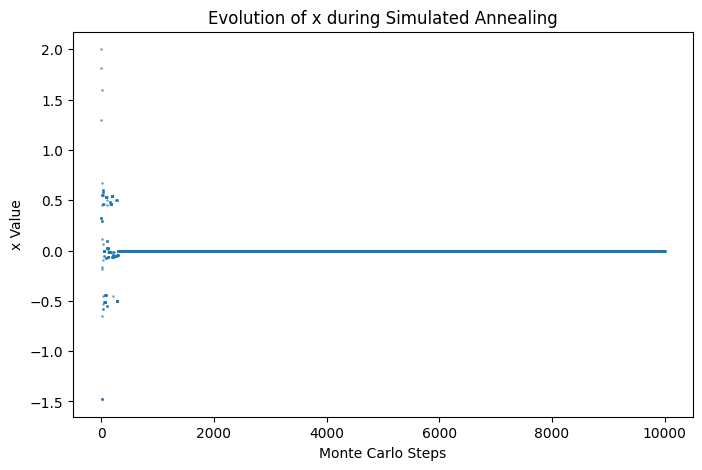

In [ ]:
def f(x):
    return x**2 - np.cos(4 * np.pi * x)

def simulated_annealing(x0=2, T0=1.0, Tmin=1e-4, alpha=0.99, max_steps=10000):
    """Performs simulated annealing to find the minimum of f(x)."""
    x = x0
    T = T0
    x_values = [x]

    for step in range(max_steps):
        x_new = x + np.random.normal(0, 1)

        delta_E = f(x_new) - f(x)

        if delta_E < 0 or np.exp(-delta_E / T) > np.random.rand():
            x = x_new

        x_values.append(x)

        T *= alpha
        if T < Tmin:
            breakpoint

    return x, x_values

final_x, x_history = simulated_annealing()

print(f"Final minimum estimate: x = {final_x:.6f}")

plt.figure(figsize=(8, 5))
plt.plot(x_history, ".", markersize=2, alpha=0.5)
plt.xlabel("Monte Carlo Steps")
plt.ylabel("x Value")
plt.title("Evolution of x during Simulated Annealing")
plt.show()

Exercise 7(b):

Final minimum estimate: x = 27.945905


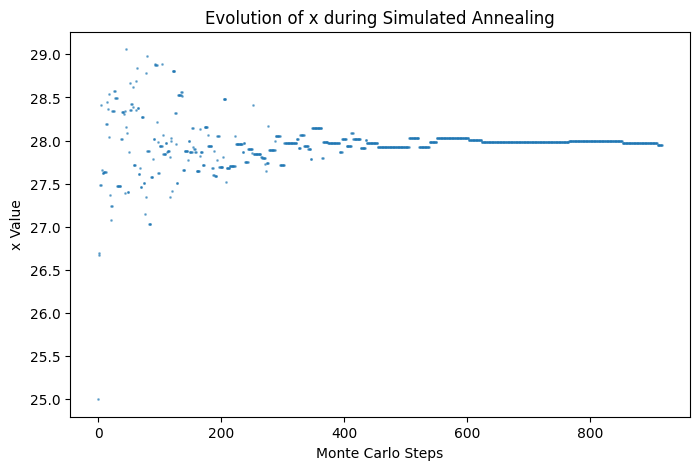

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.cos(x) + np.cos(np.sqrt(2) * x) + np.cos(np.sqrt(3) * x)

def simulated_annealing(x0=25, T0=1.0, Tmin=1e-4, alpha=0.99, max_steps=5000):
    x = x0
    T = T0
    x_values = [x]

    for step in range(max_steps):
        x_new = x + np.random.normal(0, 1)
        x_new = max(0, min(50, x_new))
        delta_E = f(x_new) - f(x)

        if delta_E < 0 or np.exp(-delta_E / T) > np.random.rand():
            x = x_new

        x_values.append(x)
        T *= alpha
        if T < Tmin:
            break

    return x, x_values

final_x, x_history = simulated_annealing()
print(f"Final minimum estimate: x = {final_x:.6f}")

plt.figure(figsize=(8, 5))
plt.plot(x_history, ".", markersize=2, alpha=0.5)
plt.xlabel("Monte Carlo Steps")
plt.ylabel("x Value")
plt.title("Evolution of x during Simulated Annealing")
plt.show()


Exercise 8:

In [ ]:
import numpy as np
from scipy.integrate import quad

def p_theta(theta):
    return np.sin(theta) / 2

def p_phi(phi):
    return 1 / (2 * np.pi)

theta_integral, _ = quad(p_theta, 0, np.pi)
phi_integral, _ = quad(p_phi, 0, 2*np.pi)

print(f"Integral of p(theta) over [0, pi]: {theta_integral}")
print(f"Integral of p(phi) over [0, 2*pi]: {phi_integral}")

def generate_random_angles():
    U = np.random.uniform(0, 1)
    V = np.random.uniform(0, 1)
    phi = 2 * np.pi * U
    theta = np.arccos(1 - 2 * V)
    return theta, phi

theta, phi = generate_random_angles()
print(f"Generated theta: {theta}")
print(f"Generated phi: {phi}")

Integral of p(theta) over [0, pi]: 1.0
Integral of p(phi) over [0, 2*pi]: 1.0
Generated theta: 0.9733487172717213
Generated phi: 1.3344062448708702
